In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style("whitegrid")

In [10]:
def make3(init):
    return [init + 3*i for i in range(10)]

# 使用惠斯通电桥测量铜电阻

In [11]:
def b_bridge(Us, R1, R2, _R3_l, _t_l):
    alpha_0 = 0.00428
    K = R1 / R2
    R3_l = np.array(_R3_l)
    Rx_l = R3_l * K
    t_l = np.array(_t_l)
    item_list = [t_l, R3_l, Rx_l]
    item_name = ['温度', 'R_3测量值', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`b_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `_R3_l` : R3测量值数列
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`


数据	温度	    R_3测量值	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	27.00	    559.70	    55.97	    
#1	30.00	    566.10	    56.61	    
#2	33.00	    572.30	    57.23	    
#3	36.00	    578.70	    57.87	    
#4	39.00	    584.90	    58.49	    
#5	42.00	    591.30	    59.13	    
#6	45.00	    597.60	    59.76	    
#7	48.00	    604.00	    60.40	    
#8	51.00	    610.30	    61.03	    
#9	54.00	    616.80	    61.68	    
---------------------------------------------------------------------------------------------------------------
R = 0.2111t + 50.268
R = 50.268 * (1 + 0.004199t)
不确定度 U_alpha = 1.9%


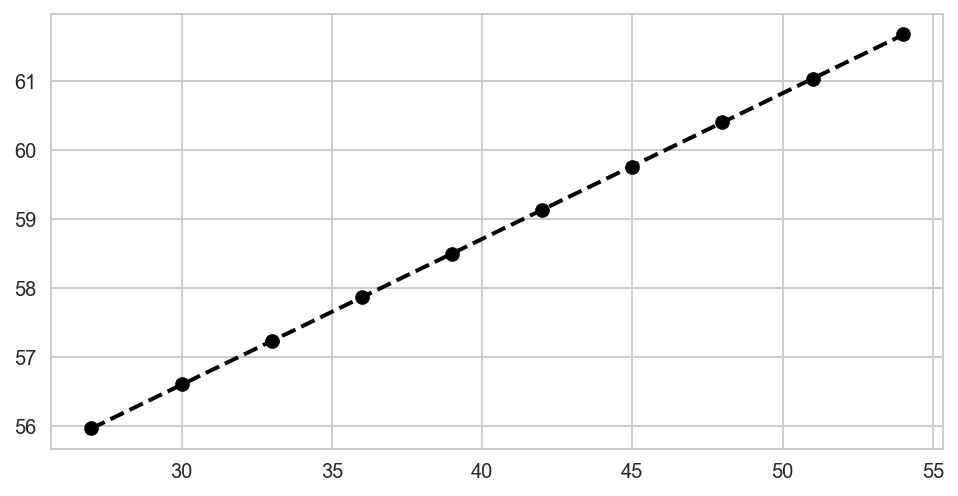

In [17]:
b_data = {
    'Us'    : 5, 
    'R1'    : 100,
    'R2'    : 1000,
    '_R3_l' : [559.70,566.10,572.30,578.70,584.90,591.30,597.60,604.00,610.30,616.80], 
    '_t_l'  : make3(27)
}
b_bridge(**b_data)

# 使用卧式电桥测量铜电阻

In [13]:
def l_bridge(Us, R2, R3, R1_0, _t_l, _U_l):
    alpha_0 = 0.00428
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    d_Rx = 4 * R1_0 * U_l * 10**-3 / Us
    Rx_l = np.round(R1_0 + d_Rx, 2)
    item_list = [t_l, U_l, d_Rx, Rx_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("R_0 = %.3f, alpha = %f" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R2` : R2阻值
3. `R3` : R3阻值
4. `R1_0` : R1初始测量值
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	29.70	    0.00	    0.00	    56.40	    
#1	32.70	    3.90	    0.68	    57.08	    
#2	35.70	    7.50	    1.30	    57.70	    
#3	38.70	    10.90	    1.89	    58.29	    
#4	41.70	    14.40	    2.50	    58.90	    
#5	44.70	    17.80	    3.09	    59.49	    
#6	47.70	    21.10	    3.66	    60.06	    
#7	50.70	    24.40	    4.23	    60.63	    
#8	53.70	    27.70	    4.81	    61.21	    
#9	56.70	    31.00	    5.38	    61.78	    
---------------------------------------------------------------------------------------------------------------
R = 0.1977t + 50.612
R = 50.612 * (1 + 0.003907t)
R_0 = 50.612, alpha = 0.003907
不确定度 U_alpha = 8.7%


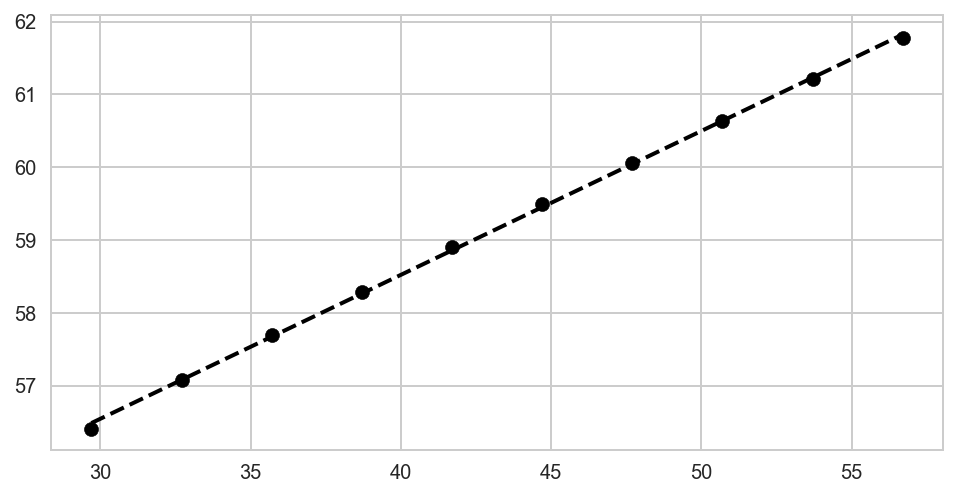

In [18]:
l_data = {
    'Us'   : 1.3,
    'R2'   : 50,
    'R3'   : 50,
    'R1_0' : 56.40,
    '_t_l' : make3(29.7),
    '_U_l' : [0,3.9,7.5,10.9,14.4,17.8,21.1,24.4,27.7,31.0]
}
l_bridge(**l_data)

# 使用立式电桥测量热敏电阻

In [15]:
def s_bridge(Us, R1, R2, R3_0, _t_l, _U_l):
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    R_ = R1
    R = R3_0
    d_Rx = ((R+R_)**2 * U_l * 10**-3) / (R_*Us - (R+R_)*U_l*10**-3)
    Rx_l = np.round(R3_0 + d_Rx, 2)
    tr_Rx_l = np.log(Rx_l)
    T_l = t_l + 273
    tr_T_l = 1 / T_l
    item_list = [t_l, U_l, d_Rx, Rx_l, T_l, tr_Rx_l, tr_T_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值','T(=t+273)', 'ln(R_x)', '1/T']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list[:-2]:
            print("%.2f" % ll[i], end='\t    ')
        print("%.4f" % item_list[-2][i], end='\t    ')
        print("%.6f" % item_list[-1][i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.rcParams['figure.dpi'] = 144
    plt.subplot(211)
    plt.scatter(T_l, Rx_l, color='black')
    plt.plot(T_l, Rx_l, color='black', linestyle='-')
    plt.subplot(212)
    L = tr_T_l.min()
    H = tr_T_l.max()
    d = (H - L) / 10
    plt.xlim(L - d, H + d)
    plt.scatter(tr_T_l, tr_Rx_l, color='black')
    A = np.vstack([tr_T_l, np.ones(len(tr_T_l))]).T
    m, c = np.linalg.lstsq(A, np.array(tr_Rx_l), rcond=1)[0]
    plt.plot(tr_T_l, m * tr_T_l + c, linewidth=2, color='black', linestyle='--')
    print("ln(R_x) = %.1f * (1/T) + (%.4f)" % (m, c))
    R_0 = np.exp(c)
    B_n = m
    print("R_x = R_0 * e^(B_n/T) = %.3f * e^(%.1f/T)" % (R_0, B_n))
    print("R_0 = %.3f, B_n = %.1f" % (R_0, B_n))

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `R3_0` : R3初始测量值
5. `_t_l` : 温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    T(=t+273)	    ln(R_x)	    1/T	    
---------------------------------------------------------------------------------------------------------------
#0	29.80	    0.00	    0.00	    2387.40	    302.80	    7.7780	    0.003303	    
#1	32.80	    -5.20	    -225.09	    2162.31	    305.80	    7.6789	    0.003270	    
#2	35.80	    -11.10	    -435.74	    1951.66	    308.80	    7.5764	    0.003238	    
#3	38.80	    -17.60	    -626.63	    1760.77	    311.80	    7.4735	    0.003207	    
#4	41.80	    -24.60	    -796.09	    1591.31	    314.80	    7.3723	    0.003177	    
#5	44.80	    -32.30	    -950.09	    1437.31	    317.80	    7.2705	    0.003147	    
#6	47.80	    -40.50	    -1085.99	    1301.41	    320.80	    7.1712	    0.003117	    
#7	50.80	    -49.30	    -1207.41	    1179.99	    323.80	    7.0733	    0.003088	    
#8	53.80	    -59.00	    -1319.00	    1068.40	    326.80	    6.9739	    0.003060	    
#9	56.80	    -69.00	    -1415.35	    972.05	    329.80	

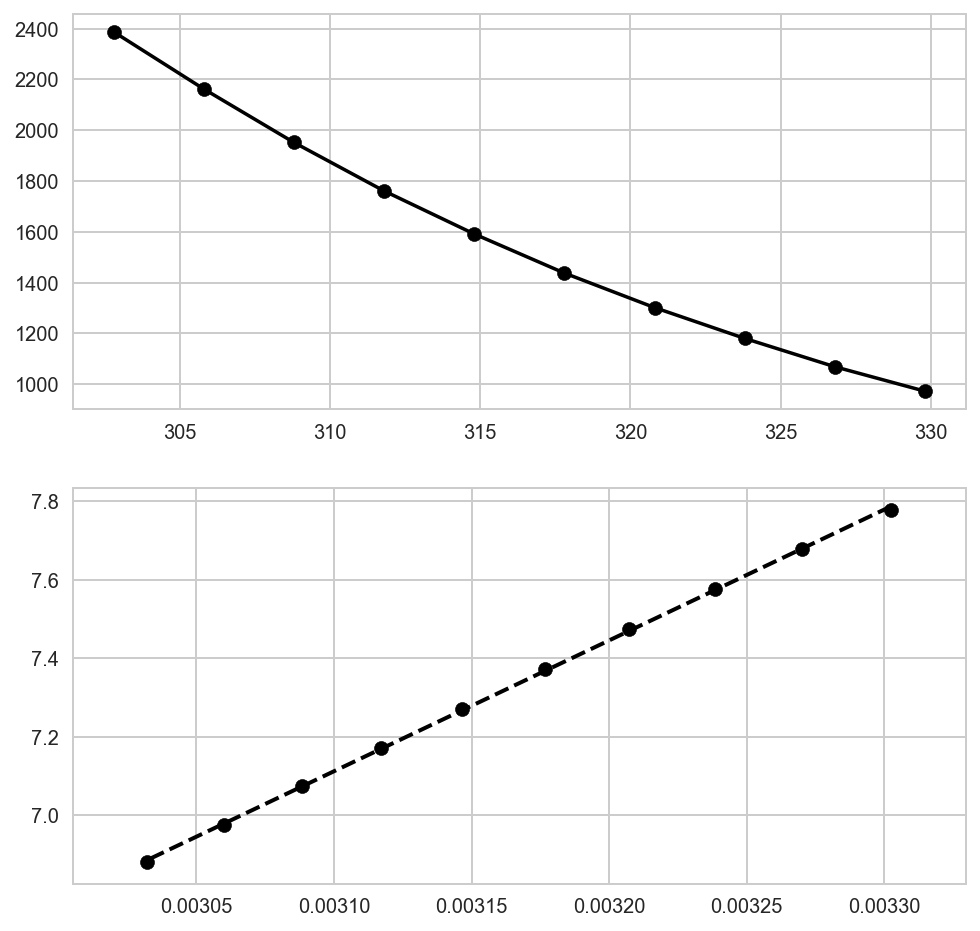

In [19]:
s_data = {
    'Us'   : 1.3, 
    'R1'   : 100, 
    'R2'   : 100, 
    'R3_0' : 2387.40, 
    '_t_l' : make3(29.8), 
    '_U_l' : [0,-5.2,-11.1,-17.6,-24.6,-32.3,-40.5,-49.3,-59.0,-69.0]
}
s_bridge(**s_data)